In [36]:
### Imports
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [44]:
def init_centroids(k: int, points: np.ndarray) -> np.ndarray:
    n: int = len(points) // k
    indicies: np.ndarray = np.arange(len(points))
    np.random.shuffle(indicies)
    init_centroids: np.ndarray = np.array([np.mean(points[indicies[n * i:n *(i + 1)]], axis = 0) for i in range(0, k)])
    return init_centroids

def init_centroids_kmeans_pp(k: int, points: np.ndarray) -> np.ndarray:
    centroids = []
    # Randomly select the first centroid
    centroids.append(points[np.random.randint(points.shape[0])])
    
    # Select the remaining centroids
    for _ in range(1, k):
        # Calculate the distance of each point to the nearest selected centroid
        distances = np.array([min(np.sum((point - centroid) ** 2) for centroid in centroids) for point in points])
        # Calculate probabilities proportional to squared distances
        probs = distances / distances.sum()
        cumulative_probs = np.cumsum(probs)
        r = np.random.rand()
        # Select the next centroid based on the distance-weighted probability
        for j, p in enumerate(cumulative_probs):
            if r < p:
                centroids.append(points[j])
                break
    
    return np.array(centroids)
def run_iteration(points: np.ndarray, centroids: np.ndarray, k: int) -> tuple[np.ndarray, list]:
    classification: list = []
    clusters: list[np.ndarray] = [[] for _ in range(k)]
    new_centroids: np.ndarray = np.zeros((k, points.shape[1]))
    for point in points:
        distances: list = [np.sqrt(np.sum((point - centroid)**2)) for centroid in centroids]
        classification.append(np.argmin(distances))
        clusters[classification[-1]].append(point)

    for i in range(len(centroids)):
        if len(clusters[i]) == 0:
            new_centroids[i] = points[np.random.randint(0, points.shape[0])]
        else:
            new_centroids[i] = np.mean(clusters[i], axis = 0)

    return new_centroids, classification

def is_not_converged(last_centroids: np.ndarray, current_centroids: np.ndarray, e: float = 1e-20) -> bool:
    dist: float = 0
    for  i in range(len(last_centroids)):
        dist += np.sqrt(np.sum((last_centroids[i] - current_centroids[i]) ** 2))
    print(dist)
    return dist > e

def load_images(dir: str, size: int = 256, grayscale: bool = True) -> np.ndarray:
    image_names: list = sorted(os.listdir(dir))
    n: int = len(image_names)
    images: np.ndarray = np.zeros([n, size ** 2])
    for i, name in enumerate(image_names):
        img: Image = Image.open(dir + "//"+ name)
        images[i] = img.getdata(0)
    return images, np.array(image_names)

def performance(centroids, points, labels):
    dist = 0
    for i, point in enumerate(points):
        dist += np.linalg.norm(point - centroids[labels[i]])
    return dist

In [38]:
image_dir_train: str = "c:/Users/finia/OneDrive - SBL/PrA/PCA of hand signs/Processed Images/Train/"
train, names_train = load_images(image_dir_train)
train = train / 255
k = 4
dimensions = 2
points: np.ndarray = train

26.41172598232428
2.1620561120783632
0.9289195702804695
0.43018893548802895
0.12453052672472414
0.2946464369551889
0.11052761272971813
0.0
Final centroids: [[4.94806116 5.7582306 ]
 [6.07298805 4.90743255]
 [4.1717177  4.4667684 ]
 [6.66254931 3.86334668]]
7
35.42823128170366
33.67522278621575


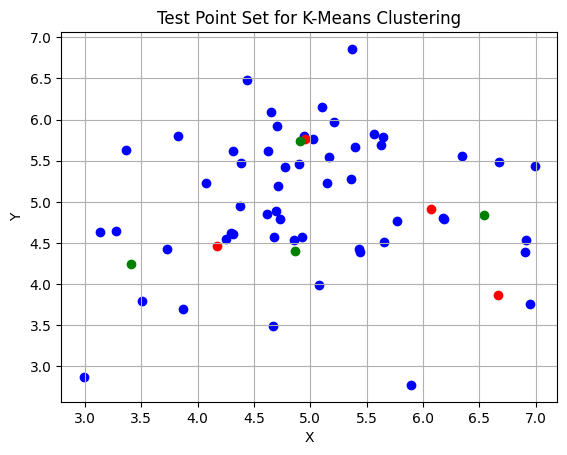

In [46]:
np.random.seed(214013275)

# Generate points for three clusters
cluster_1 = np.random.randn(55, 2) + np.array([5, 5])


# Combine the clusters into a single dataset
points = np.vstack((cluster_1))
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o')
plt.title('Test Point Set for K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

classification: list = []
centroids = init_centroids_kmeans_pp(k, points)
last_centroids = np.zeros_like(centroids)
iteration = 0
while is_not_converged(last_centroids, centroids):
    iteration += 1
    last_centroids = centroids.copy()
    centroids, classification = run_iteration(points, centroids, k)

print("Final centroids:", centroids)
print(iteration)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o')

print(performance(centroids, points, classification))


kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=0)
kmeans.fit(points)  # Fit the model to your data

# Get the results
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(performance(centroids, points, labels))
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', marker='o')
plt.show()